In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv("a.csv",index_col='Date',header=0,parse_dates=[0])
df.head()

,Date.1,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,,
2004-03-10,03-10-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10,03-10-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10,03-10-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10,03-10-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10,03-10-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


<AxesSubplot:xlabel='Date'>

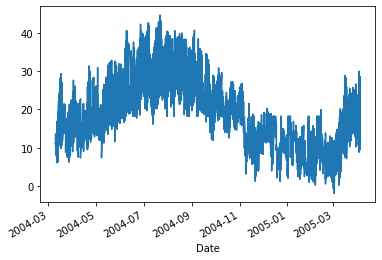

In [10]:
df['T'].plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df['T'])
dftest

(-2.6121319935463645,
 0.09051566571627495,
 38,
 9318,
 {'1%': -3.431051985659412,
  '5%': -2.8618502334031457,
  '10%': -2.5669351321592124},
 46467.00580520139)

In [12]:
from pmdarima import auto_arima

stepwise_fit=auto_arima(df['T'],trace=True,suppres_worings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49053.512, Time=2.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50470.708, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49192.132, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49259.057, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50468.710, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=49158.000, Time=1.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=49164.396, Time=2.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=49008.951, Time=5.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=49145.740, Time=1.97 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=48072.340, Time=10.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=48097.148, Time=9.28 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=48208.304, Time=10.69 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=48047.743, Time=9.25 sec
 ARIMA(2,1,4)(0,0,0)[0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9357
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -23954.163
Date:                Fri, 12 Nov 2021   AIC                          47928.325
Time:                        17:37:02   BIC                          47999.763
Sample:                             0   HQIC                         47952.587
                               - 9357                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4025      0.034    -11.859      0.000      -0.469      -0.336
ar.L2          0.3839      0.034     11.135      0.000       0.316       0.452
ar.L3          0.2148      0.031      6.823      0.000       0.153       0.276
ar.L4         -0.1265      0.028     -4.443      0.000      -0.182      -0.071
ma.L1         -0.0606      0.034     -1.789      0.074      -0.127       0.006
ma.L2         -0.5005      0.035    -14.412      0.000      -0.569      -0.432
ma.L3         -0.0412      0.036     -1.141      0.254      -0.112       0.030
ma.L4          0.0349      0.031      1.109      0.268      -0.027       0.097
ma.L5         -0.3527      0.015    -23.133      0.000      -0.383      -0.323
sigma2         9.8015      0.110     89.316      0.000       9.586      10.017
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3561.38
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
data=df['T']

In [16]:
data.shape

(9357,)

In [17]:
train=df[1:data.shape[0]-7]
test=df[data.shape[0]-7:]

In [23]:
model=ARIMA(train['T'],order=(4,1,5))
model_fit=model.fit()
model

C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      T   No. Observations:                 9349
Model:                 ARIMA(4, 1, 5)   Log Likelihood              -23913.602
Date:                Fri, 12 Nov 2021   AIC                          47847.204
Time:                        17:48:57   BIC                          47918.633
Sample:                             0   HQIC                         47871.464
                               - 9349                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3904      0.034    -11.396      0.000      -0.458      -0.323
ar.L2          0.3773      0.035     10.853      0.000       0.309       0.445
ar.L3          0.2107      0.032      6.581      0.000       0.148       0.273
ar.L4         -0.1233      0.029     -4.272      0.000      -0.180      -0.067
ma.L1         -0.0697      0.034     -2.035      0.042      -0.137      -0.003
ma.L2         -0.4896      0.035    -13.794      0.000      -0.559      -0.420
ma.L3         -0.0423      0.037     -1.153      0.249      -0.114       0.030
ma.L4          0.0305      0.032      0.940      0.347      -0.033       0.094
ma.L5         -0.3492      0.015    -22.566      0.000      -0.380      -0.319
sigma2         9.7591      0.109     89.134      0.000       9.544       9.974
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3530.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2005-04-04    11.412542
2005-04-04    13.797701
2005-04-04    15.331912
2005-04-04    15.090134
2005-04-04    16.519654
2005-04-04    15.899524
2005-04-04    16.440894
Name: predicted_mean, dtype: float64


C:\Users\VEDANG SAWANT\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

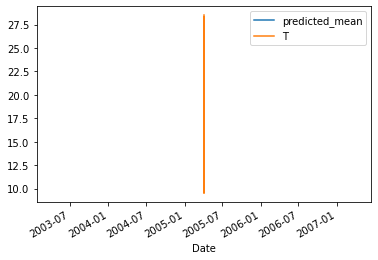

In [28]:
pred.plot(legend=True)
test['T'].plot(legend=True)

In [31]:
test['T'].mean()

16.52857142857143

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['T']))
rmse

6.9977417398708495

In [35]:
data.tail()

Date
2005-04-04    12.1
2005-04-04    14.2
2005-04-04    28.3
2005-04-04     9.5
2005-04-04    28.5
Name: T, dtype: float64

In [ ]:
index_future_dates=pd.date_range(start='2005-04-04',end='2006-04-04')